#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\envs\tf\lib\site-packages\tenso

# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [23]:
model1 = Sequential()

#卷積層1
model1.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32, 32,3),activation='relu',padding='same'))
model1.add(Dropout(rate=0.25))
model1.add(MaxPooling2D(pool_size=(2, 2)))
#卷積層2與池化層2
model1.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu', padding='same'))
model1.add(Dropout(0.25))
model1.add(MaxPooling2D(pool_size=(2, 2)))
#建立神經網路(平坦層、隱藏層、輸出層)
model1.add(Flatten())
model1.add(Dropout(rate=0.25))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(rate=0.25))
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

# 訓練模型

In [24]:
#模型編譯
model1.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
history1=model1.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=8, batch_size=128, verbose=1) 

#模型編譯
model1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
history2=model1.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=8, batch_size=128, verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/8
37500/37500 [==============================] - 132s 4ms/step - loss: 0.0698 - accuracy: 0.4323 - val_loss: 0.0621 - val_accuracy: 0.5535
Epoch 2/8
37500/37500 [==============================] - 127s 3ms/step - loss: 0.0572 - accuracy: 0.5609 - val_loss: 0.0582 - val_accuracy: 0.5728
Epoch 3/8
37500/37500 [==============================] - 126s 3ms/step - loss: 0.0508 - accuracy: 0.6184 - val_loss: 0.0516 - val_accuracy: 0.6334
Epoch 4/8
37500/37500 [==============================] - 129s 3ms/step - loss: 0.0464 - accuracy: 0.6595 - val_loss: 0.0481 - val_accuracy: 0.6568
Epoch 5/8
37500/37500 [==============================] - 132s 4ms/step - loss: 0.0427 - accuracy: 0.6892 - val_loss: 0.0451 - val_accuracy: 0.6783
Epoch 6/8
37500/37500 [==============================] - 139s 4ms/step - loss: 0.0391 - accuracy: 0.7199 - val_loss: 0.0440 - val_accuracy: 0.6828
Epoch 7/8
37500/37500 [==============================] - 135s 4ms/st

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history,train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

### loss = MSE

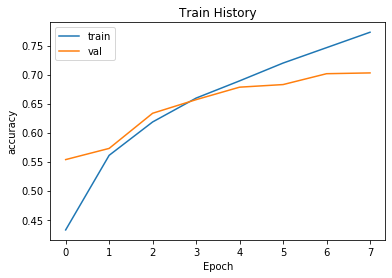

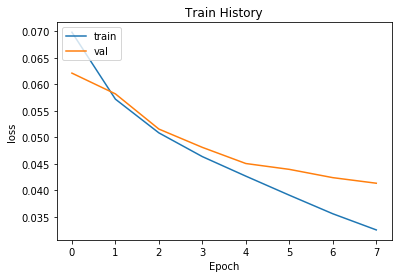

In [39]:
show_train_history(history1,'accuracy','val_accuracy')
show_train_history(history1,'loss','val_loss')

### loss = binary_crossentropy

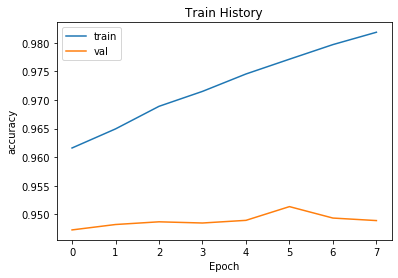

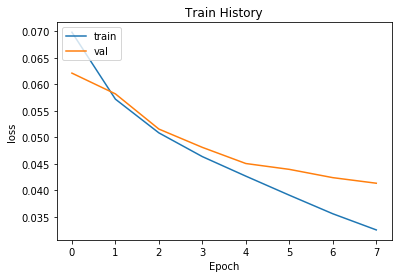

In [40]:
show_train_history(history2,'accuracy','val_accuracy')
show_train_history(history1,'loss','val_loss')